In [1]:
import requests
import datetime
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
api = "https://api.studio.thegraph.com/query/1729/tricrypto-eth-1/v0.0.6"

In [4]:
query = """
{
  assetPrices(first: 1000) {
    id
    timestamp
    blockNumber
    crv3cryptoUSD
    crv3cryptoETH
    crv3cryptoBTC
    btcPrice
    ethPrice
    indexNumUSD
    indexNumBTC
    indexNumETH
  }
}
"""
r = requests.post(api, json={'query': query})
data = dict(r.json())
df = pd.DataFrame(data['data']['assetPrices'])
df.set_index('blockNumber', inplace=True)
df.sort_index(inplace=True)
df

,btcPrice,crv3cryptoBTC,crv3cryptoETH,crv3cryptoUSD,ethPrice,id,indexNumBTC,indexNumETH,indexNumUSD,timestamp
blockNumber,,,,,,,,,,
12821270,32560,0.03680923628808453914510559270877571,0.613298911851413670332943454404737,1198.508733540032594564638098597737,1954.2,0x018c1de771018c45c9fd7f8347d08399bede5ff2824e...,0.01226974542936151304836853090292524,0.2044329706171378901109811514682457,399.5029111800108648548793661992457,1626212895
12821275,32497.740048663367631567,0.03905724299291977815903243781682802,0.5458049331353451890567208732288878,1269.27212980138576590981416715839,2325.505052712009557631,0x06540cd2c3ab30b4cd16b157c32ce3126d24b7f696be...,0.01301908099763992605301081260560934,0.1819349777117817296855736244096293,423.0907099337952553032713890527967,1626212971
12824157,32059.524397401499418708,0.0367611420247962004130554020974033,0.6251578807737807498776913528727925,1178.544729620295343249249045442355,1885.195349631628208774,0x06b546530510565a1b18d0a34d32fb46766a23a6ec82...,0.01225371400826540013768513403246777,0.2083859602579269166258971176242642,392.848243206765114416416348480785,1626252266
12824712,32292.927806520857050102,0.03687874597996006790409117144134241,0.6167130299770107970752820905625778,1190.92268152587175043225692357352,1931.080784153799634237,0x0618c259262863802918f87f74ebe1cf99d099391041...,0.01229291532665335596803039048044747,0.2055710099923369323584273635208593,396.9742271752905834774189745245067,1626259799
12824913,32533.678233920924444261,0.03673318875425481215237036341223128,0.616907872662868681213851236566046,1195.065743436808659696522099279415,1937.186728187362549846,0x06d025f84523148f45db35aba4b0425bfa6c80cd7cff...,0.01224439625141827071745678780407709,0.2056359575542895604046170788553486,398.3552478122695532321740330931383,1626262411
...,...,...,...,...,...,...,...,...,...,...
13715884,57289.512957957465723519,0.03384483236654383907940465864405804,0.4190588823009542122742835241605038,1938.953962423011509157288309128519,4626.924865013406352654,0x058d54f38e6cbfc259dadeda2b5b2745ead837422d2c...,0.01128161078884794635980155288135268,0.1396862941003180707580945080535013,646.3179874743371697190961030428397,1638290636
13716265,57311.223837641214918017,0.03376303324199293938965978957464939,0.4209396824242157102300828362989568,1935.000755569578497926636111943484,4596.859921653854200978,0x0549a2cec3bda7ef4de46079717de15ccd63bbe2a942...,0.01125434441399764646321992985821646,0.1403132274747385700766942787663189,645.000251856526165975545370647828,1638295612
13716369,57400.560589583053344564,0.03372800118858691663811480530344269,0.4211594564909046099634274601117812,1936.006175791012547677265237609066,4596.848404929078630006,0x060c101ea16b8462ed2010b94594a1a036bef7f73919...,0.0112426670628623055460382684344809,0.1403864854969682033211424867039271,645.3353919303375158924217458696887,1638297083


In [5]:
df['utc_time'] = df.timestamp.apply(lambda x: datetime.datetime.fromtimestamp(int(x)))
df.set_index('utc_time', inplace=True)

In [6]:
df.crv3cryptoUSD = df.crv3cryptoUSD.astype(float)
df.crv3cryptoETH = df.crv3cryptoETH.astype(float)
df.crv3cryptoBTC = df.crv3cryptoBTC.astype(float)
df.indexNumBTC = df.indexNumBTC.astype(float)
df.indexNumETH = df.indexNumETH.astype(float)
df.indexNumUSD = df.indexNumUSD.astype(float)
df.btcPrice = df.btcPrice.astype(float)
df.ethPrice = df.ethPrice.astype(float)

In [7]:
df['index_price'] = (
        df.indexNumBTC.iloc[0]*df.btcPrice +
        df.indexNumETH.iloc[0]*df.ethPrice +
        df.indexNumUSD.iloc[0]
)
df

,btcPrice,crv3cryptoBTC,crv3cryptoETH,crv3cryptoUSD,ethPrice,id,indexNumBTC,indexNumETH,indexNumUSD,timestamp,index_price
utc_time,,,,,,,,,,,
2021-07-13 23:48:15,32560.000000,0.036809,0.613299,1198.508734,1954.200000,0x018c1de771018c45c9fd7f8347d08399bede5ff2824e...,0.012270,0.204433,399.502911,1626212895,1198.508734
2021-07-13 23:49:31,32497.740049,0.039057,0.545805,1269.272130,2325.505053,0x06540cd2c3ab30b4cd16b157c32ce3126d24b7f696be...,0.013019,0.181935,423.090710,1626212971,1273.651815
2021-07-14 10:44:26,32059.524397,0.036761,0.625158,1178.544730,1885.195350,0x06b546530510565a1b18d0a34d32fb46766a23a6ec82...,0.012254,0.208386,392.848243,1626252266,1178.261200
2021-07-14 12:49:59,32292.927807,0.036879,0.616713,1190.922682,1931.080784,0x0618c259262863802918f87f74ebe1cf99d099391041...,0.012293,0.205571,396.974227,1626259799,1190.505496
2021-07-14 13:33:31,32533.678234,0.036733,0.616908,1195.065743,1937.186728,0x06d025f84523148f45db35aba4b0425bfa6c80cd7cff...,0.012244,0.205636,398.355248,1626262411,1194.707698
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30 17:43:56,57289.512958,0.033845,0.419059,1938.953962,4626.924865,0x058d54f38e6cbfc259dadeda2b5b2745ead837422d2c...,0.011282,0.139686,646.317987,1638290636,2048.326646
2021-11-30 19:06:52,57311.223838,0.033763,0.420940,1935.000756,4596.859922,0x0549a2cec3bda7ef4de46079717de15ccd63bbe2a942...,0.011254,0.140313,645.000252,1638295612,2042.446767
2021-11-30 19:31:23,57400.560590,0.033728,0.421159,1936.006176,4596.848405,0x060c101ea16b8462ed2010b94594a1a036bef7f73919...,0.011243,0.140386,645.335392,1638297083,2043.540552


MVP: show tricrypto lp token price, allow user to pick a timestamp in the past, and spit out impermanent loss had they decided to hodl eth or btc instead of lp-ing. also plot index price with tricrypto lp price.

Basic price chart:

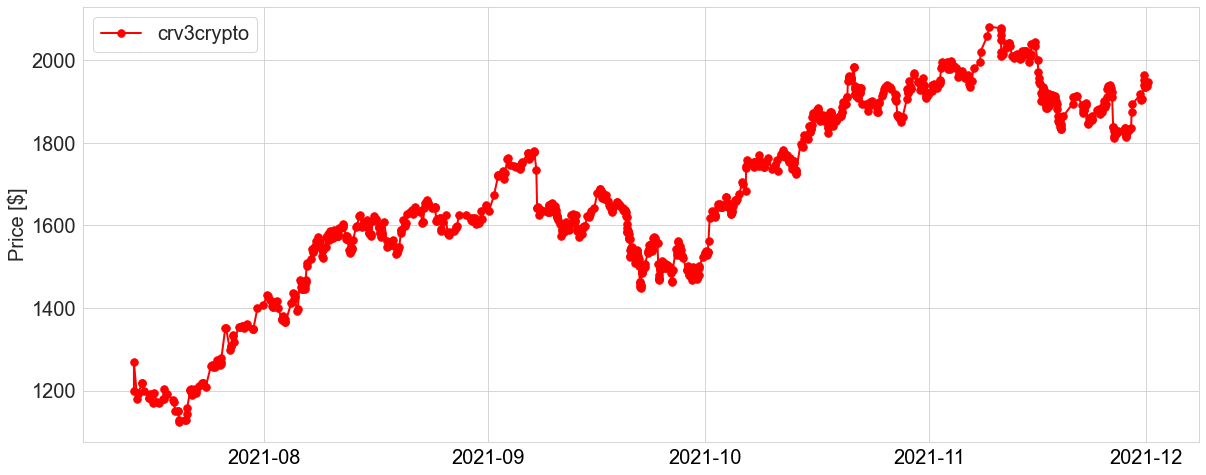

In [8]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    df.index,
    df.crv3cryptoUSD,
    '.-',
    color='red',
    lw=2,
    ms=15,
    label='crv3crypto'
)

ax.set_xlabel("")
ax.set_ylabel("Price [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

Now we add index price using the index constituents from the first measurement:

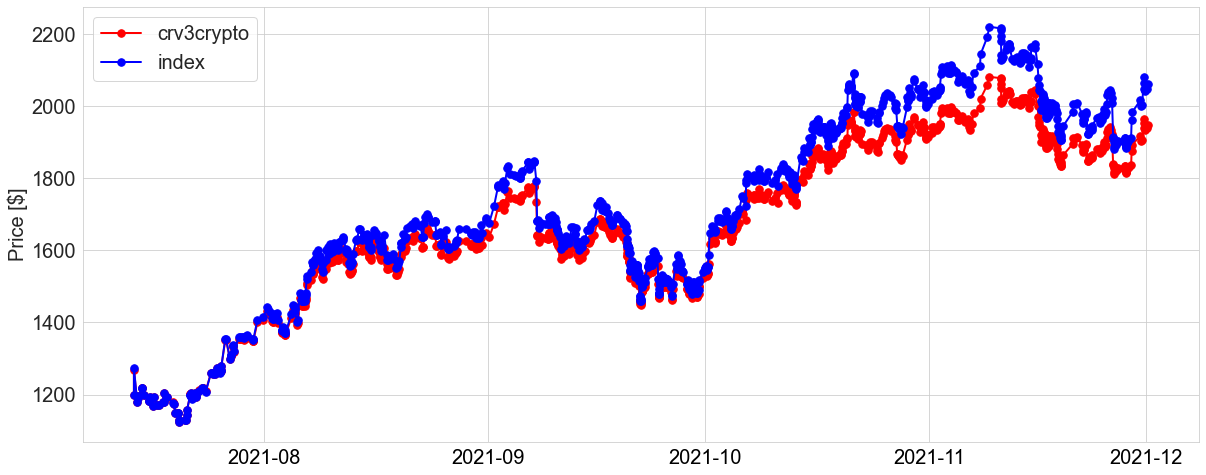

In [9]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    df.index,
    df.crv3cryptoUSD,
    '.-',
    color='red',
    lw=2,
    ms=15,
    label='crv3crypto'
)

ax.plot(
    df.index,
    df.index_price,
    '.-',
    color='b',
    lw=2,
    ms=15,
    label='index'
)

ax.set_xlabel("")
ax.set_ylabel("Price [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

So, the index slightly outperforms crv3crypto. Now, the user gets to choose an 'epoch' from where they'd like to know their 'impermanent loss'.

In [10]:
user_input_index = 0
num_eth = df.crv3cryptoETH.iloc[user_input_index]
num_btc = df.crv3cryptoBTC.iloc[user_input_index]
num_usd = df.crv3cryptoUSD.iloc[user_input_index]
print(num_usd, num_btc, num_eth)

1198.5087335400326 0.03680923628808454 0.6132989118514137


The user at their chosen timestamp (or dataframe index) would have 1128 dollars, or 0.03 btc or 0.63 eth if they did not hodl crv3crypto and hodled either of the three instead. Let's get the price: usd remains flat of course, since we're measuring everything against the dollar.

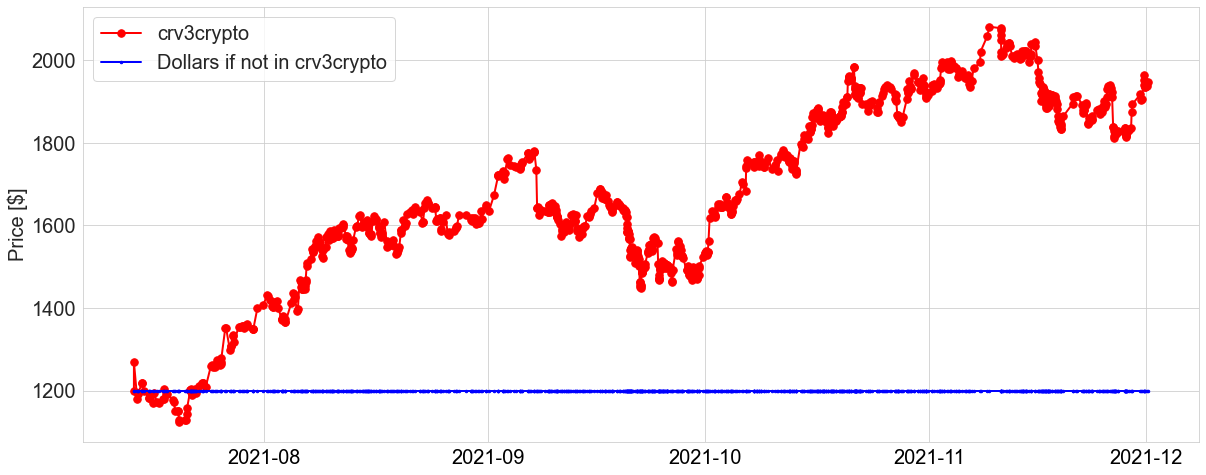

In [11]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

df_il = df.copy()
df_il['dollar_value'] = num_usd * 1

ax.plot(
    df_il.index,
    df_il.crv3cryptoUSD,
    '.-',
    color='red',
    lw=2,
    ms=15,
    label='crv3crypto'
)

ax.plot(
    df_il.index,
    df_il.dollar_value,
    '.-',
    color='b',
    lw=2,
    ms=5,
    label='Dollars if not in crv3crypto'
)

ax.set_xlabel("")
ax.set_ylabel("Price [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

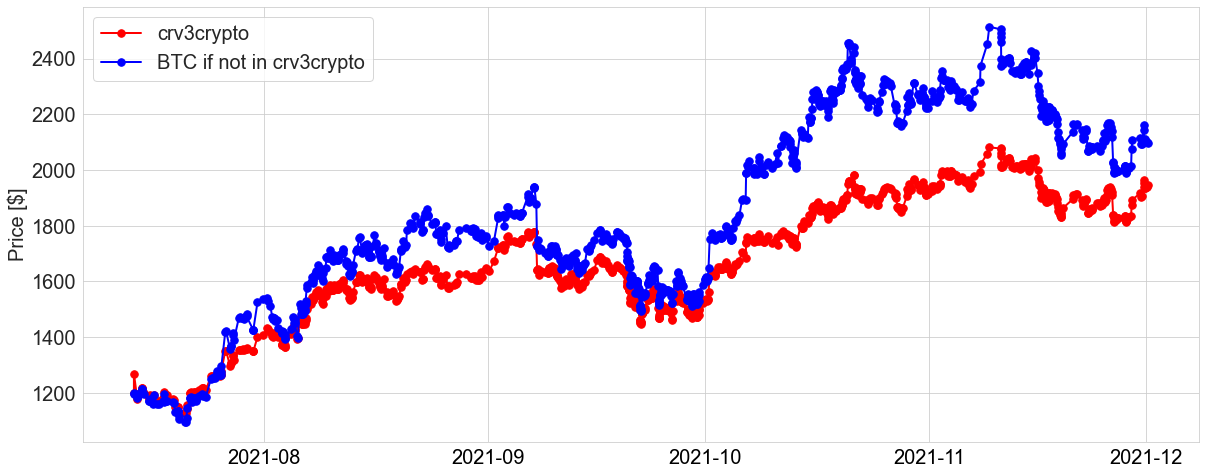

In [12]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

df_il = df.copy()
df_il['dollar_value'] = num_btc * df_il.btcPrice

ax.plot(
    df_il.index,
    df_il.crv3cryptoUSD,
    '.-',
    color='red',
    lw=2,
    ms=15,
    label='crv3crypto'
)

ax.plot(
    df_il.index,
    df_il.dollar_value,
    '.-',
    color='b',
    lw=2,
    ms=15,
    label='BTC if not in crv3crypto'
)

ax.set_xlabel("")
ax.set_ylabel("Price [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

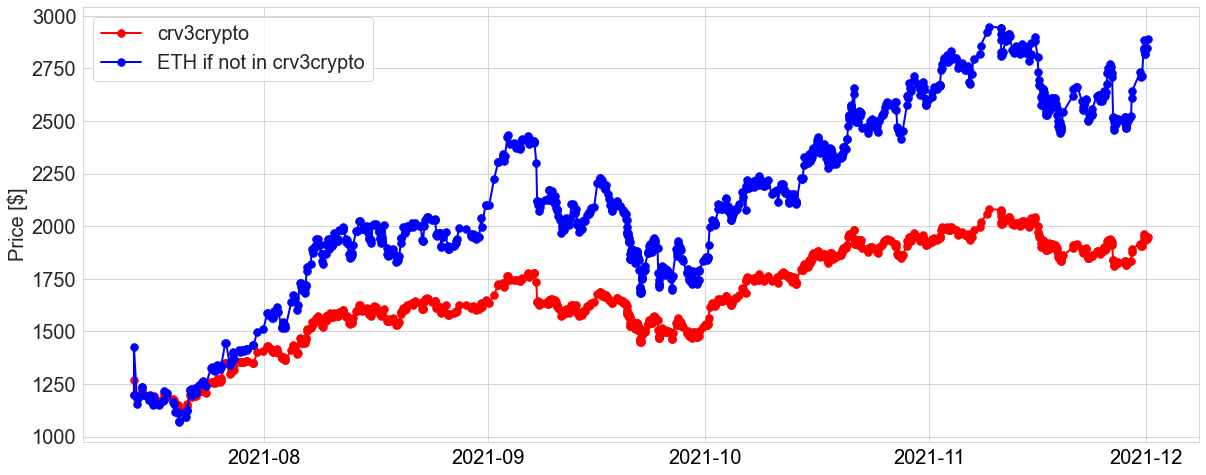

In [13]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

df_il = df.copy()
df_il['dollar_value'] = num_eth * df_il.ethPrice

ax.plot(
    df_il.index,
    df_il.crv3cryptoUSD,
    '.-',
    color='red',
    lw=2,
    ms=15,
    label='crv3crypto'
)

ax.plot(
    df_il.index,
    df_il.dollar_value,
    '.-',
    color='b',
    lw=2,
    ms=15,
    label='ETH if not in crv3crypto'
)

ax.set_xlabel("")
ax.set_ylabel("Price [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

A convenience function for backwards-looking IL on tricrypto2-eth:

In [14]:
def get_tricrypto_il(input_index: int = 0, num_lp_tokens: float = 1):

    df_il = df.copy()
    timestamp_at_input = df_il.index[input_index]

    num_eth = df_il.crv3cryptoETH.iloc[input_index]
    num_btc = df_il.crv3cryptoBTC.iloc[input_index]
    num_usd = df_il.crv3cryptoUSD.iloc[input_index]
    df_il['usdPrice'] = 1
    df_il.loc[df_il.index<timestamp_at_input, "usdPrice"] = np.nan
    df_il.loc[df_il.index<timestamp_at_input, "btcPrice"] = np.nan
    df_il.loc[df_il.index<timestamp_at_input, "ethPrice"] = np.nan

    df_il['USD'] = num_usd * df_il.usdPrice * num_lp_tokens
    df_il['ETH'] = num_eth * df_il.ethPrice * num_lp_tokens
    df_il['BTC'] = num_btc * df_il.btcPrice * num_lp_tokens

    for il_component in ['USD', 'ETH', 'BTC']:

        fig, ax = plt.subplots(1,1, figsize=(20, 8))

        ax.plot(
            df_il.index,
            df_il.crv3cryptoUSD * num_lp_tokens,
            color='red',
            lw=2,
            ms=15,
            label='crv3crypto'
        )

        ax.plot(
            df_il.index,
            df_il[il_component],
            color='b',
            lw=2,
            ms=15,
            label=f'{il_component} if not in crv3crypto'
        )

        ax.set_xlabel("")
        ax.set_ylabel("Price [$]", fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=20)
        ax.tick_params(axis='x', which='major', colors='black')
        ax.legend(fontsize=20)
        ax.set_title(
            f"Impermanent Loss for curve.fi tricrypto2 pool: "
            f"measured from {timestamp_at_input} for {num_lp_tokens} crv3crypto tokens.",
            fontsize=20
        )
        ax.yaxis.get_major_formatter().set_scientific(False)
        ax.yaxis.get_major_formatter().set_useOffset(False)

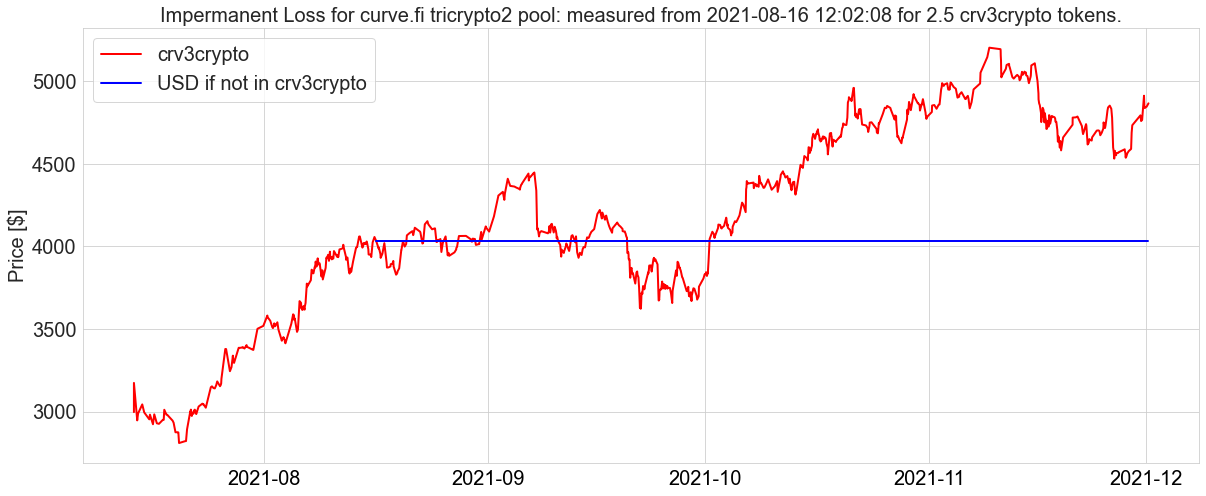

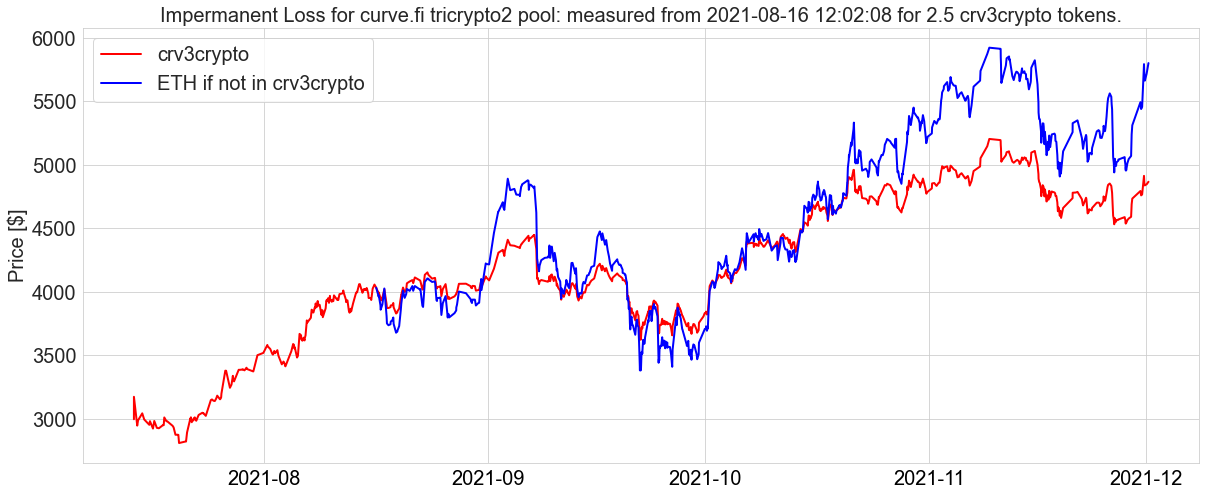

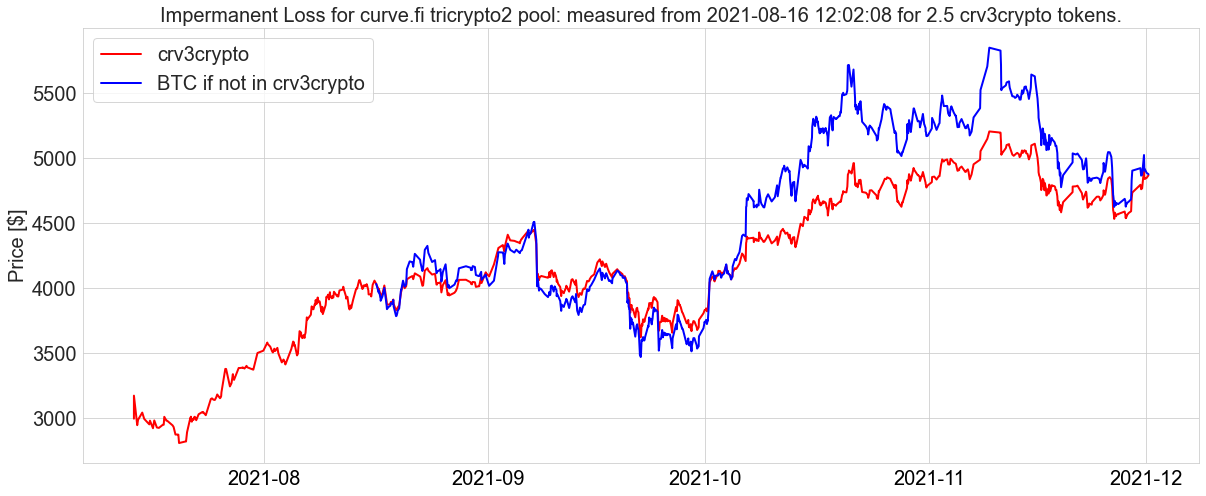

In [15]:
get_tricrypto_il(input_index=200, num_lp_tokens=2.5)